# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will plot first an <b>"event"</b> variable: the number of primary vertices: 

In [4]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_actual", &mu);

float evtw = -1;
tree->SetBranchAddress("EventWeight", &evtw);

vector<float> *tracks_pt;
vector<float> *clusters_pt;
vector<float> *tracks_eta;
vector<float> *clusters_eta;
vector<float> *tracks_phi;
vector<float> *clusters_phi;
vector<float> *tracks_m;
vector<float> *clusters_m;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);
tree->SetBranchAddress("Tracks_eta", &tracks_eta);
tree->SetBranchAddress("Clusters_eta", &clusters_eta);
tree->SetBranchAddress("Tracks_phi", &tracks_phi);
tree->SetBranchAddress("Clusters_phi", &clusters_phi);
tree->SetBranchAddress("Tracks_m", &tracks_m);
tree->SetBranchAddress("Clusters_m", &clusters_m);

vector<float> *particle_pt;
vector<float> *particle_eta;
vector<float> *particle_phi;
vector<float> *particle_m;
vector<int> *particle_id;

tree->SetBranchAddress("Particles_pt", &particle_pt);
tree->SetBranchAddress("Particles_eta", &particle_eta);
tree->SetBranchAddress("Particles_phi", &particle_phi);
tree->SetBranchAddress("Particles_m", &particle_m);
tree->SetBranchAddress("Particles_pdgID", &particle_id);

Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Define histograms

In [6]:
TH1F *hist_npv = new TH1F("NPV","Number of primary vertices; NPV ; Events ",50,1,50);
TH1F *hist_mu = new TH1F("mu","Average number of interactions; #mu ; Events ",80,1,80);

TH2F *hist_npv_mu = new TH2F("NPV vs. mu","Pileup; NPV; #mu ",50,1,50,50,1,80);

TH1F *hist_nTrks = new TH1F("NTracks","Number of tracks; NTracks ; Events ",50,0,1000);
TH1F *hist_nCltrs = new TH1F("NClusters","Number of clusters; NClusters ; Events ",50,0,1000);

TH2F *hist_nTrks_npv = new TH2F("NTracks vs. NPV","; NTracks; NPV ",50,0,1000,50,1,50);
TH2F *hist_nTrks_mu = new TH2F("NTracks vs. #mu","; NTracks; #mu ",50,0,1000,80,1,80);

TH2F *hist_nCltrs_npv = new TH2F("NClusters vs. NPV","; NClusters; NPV ",50,0,1000,50,1,50);
TH2F *hist_nCltrs_mu = new TH2F("NClusters vs. #mu","; NClusters; #mu ",50,0,1000,80,1,80);

TH1F *hist_track_pT = new TH1F("Track_pT","Track pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_track_eta = new TH1F("Track_eta","Track eta; eta ; Events ",50,-3,3);
TH1F *hist_track_phi = new TH1F("Track_phi","Track phi; phi ; Events ",50,-3.2,3.2);
TH1F *hist_track_m = new TH1F("Track_m","Track m; m (MeV) ; Events ",50,100,1000);

TH1F *hist_cluster_pT = new TH1F("Cluster_pT","Cluster pT; pT (MeV) ; Events ",100,100,2000);
TH1F *hist_cluster_eta = new TH1F("Cluster_eta","Cluster eta; eta ; Events ",50,-5,5);
TH1F *hist_cluster_phi = new TH1F("Cluster_phi","Cluster phi; phi ; Events ",50,-3.2,3.2);
TH1F *hist_cluster_m = new TH1F("Cluster_m","Cluster m; m (MeV) ; Events ",50,100,1000);

TH1F *hist_particle_pT = new TH1F("Particle_pT","Particle pT; pT (MeV) ; Events ",100,100,2000);
TH1F *hist_particle_eta = new TH1F("Particle_eta","Particle eta; eta ; Events ",50,-5,5);
TH1F *hist_particle_phi = new TH1F("Particle_phi","Particle phi; phi ; Events ",50,-3.2,3.2);
TH1F *hist_particle_m = new TH1F("Particle_m","Particle m; m (MeV) ; Events ",100,100,4000);
TH1F *hist_particle_id = new TH1F("Particle_id","Particle id; id ; Events ",1000,-500,500);

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv->Fill(npv);
    hist_mu->Fill(mu);
    hist_npv_mu->Fill(npv,mu);
    hist_nTrks->Fill(tracks_pt->size());
    hist_nCltrs->Fill(clusters_pt->size()); 
    hist_nTrks_npv->Fill(tracks_pt->size(),npv);
    hist_nCltrs_npv->Fill(clusters_pt->size(),npv); 
    hist_nTrks_mu->Fill(tracks_pt->size(),mu);
    hist_nCltrs_mu->Fill(clusters_pt->size(),mu); 

    for(int tr=0; tr<tracks_pt->size(); tr++){
        hist_track_pT->Fill(tracks_pt->at(tr));
        hist_track_eta->Fill(tracks_eta->at(tr));
        hist_track_phi->Fill(tracks_phi->at(tr));
        hist_track_m->Fill(tracks_m->at(tr));
    }
    for(int cl=0; cl<clusters_pt->size(); cl++){
        hist_cluster_pT->Fill(clusters_pt->at(cl));
        hist_cluster_eta->Fill(clusters_eta->at(cl));
        hist_cluster_phi->Fill(clusters_phi->at(cl));
        hist_cluster_m->Fill(clusters_m->at(cl));
    }
    for(int p=0; p<particle_pt->size(); p++){
        hist_particle_pT->Fill(particle_pt->at(p));
        hist_particle_eta->Fill(particle_eta->at(p));
        hist_particle_phi->Fill(particle_phi->at(p));
        hist_particle_m->Fill(particle_m->at(p));
        hist_particle_id->Fill(particle_id->at(p));
    } 
}

std::cout << "Done!" << std::endl;

Done!


<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

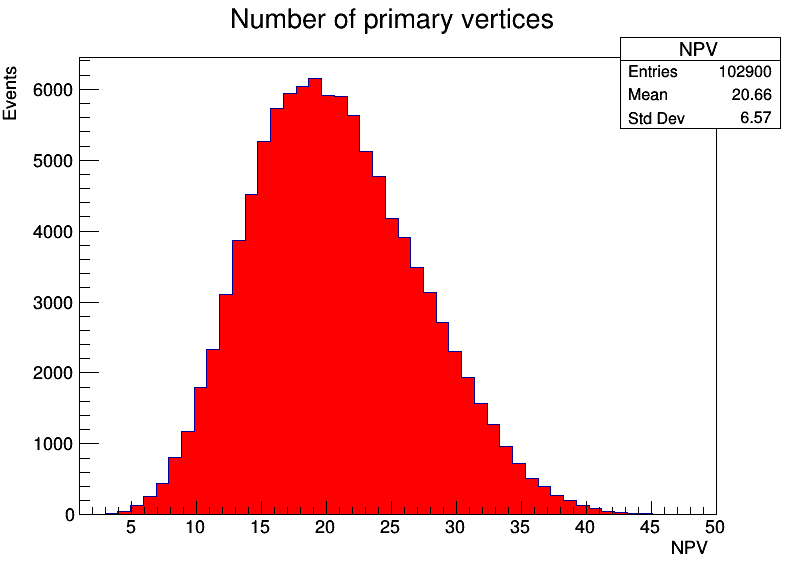

In [8]:
hist_npv->SetFillColor(kRed);
hist_npv->Draw();
canvas->Draw();

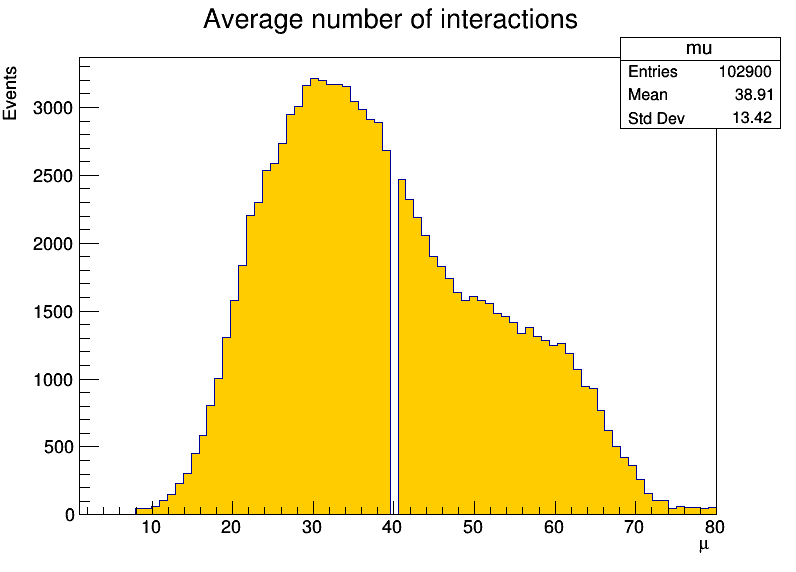

In [9]:
hist_mu->SetFillColor(kOrange);
hist_mu->Draw();
canvas->Draw();

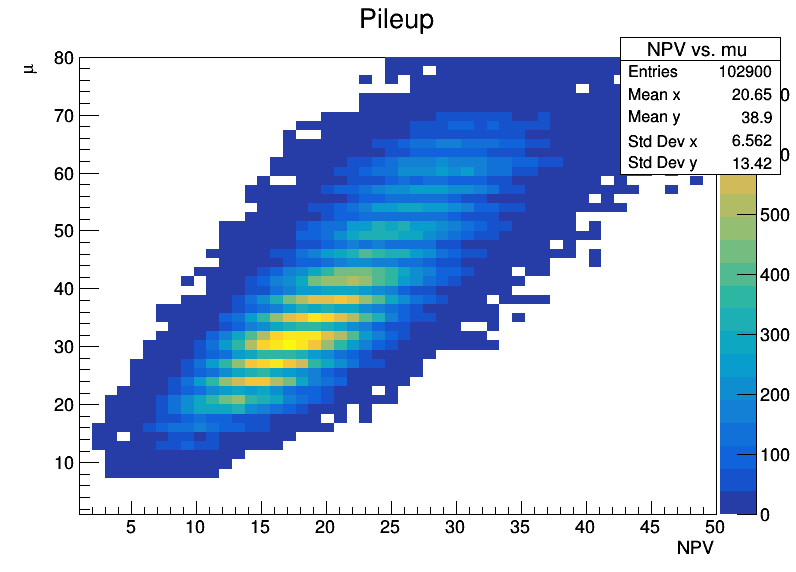

In [10]:
hist_npv_mu->Draw("colz");
canvas->Draw();

<b>
    Correlation between pileup variables: 
    
    NPV: In-time pileup - number of simultaneous collisions per bunch-crossing. Primary metric for trackers, where individual bunch crossings can be resolved. 
    
    mu: Out-of-time pileup - number of collisions on average over many bunch crossings. Primary metric for calorimeters, where the readout time is longer than the bunch separation 
</b>

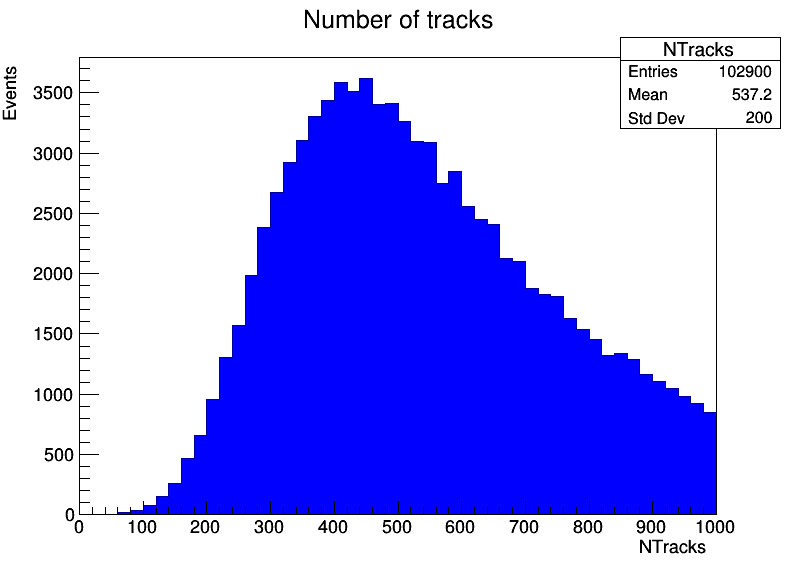

In [11]:
hist_nTrks->SetFillColor(kBlue);
hist_nTrks->Draw();
canvas->Draw();

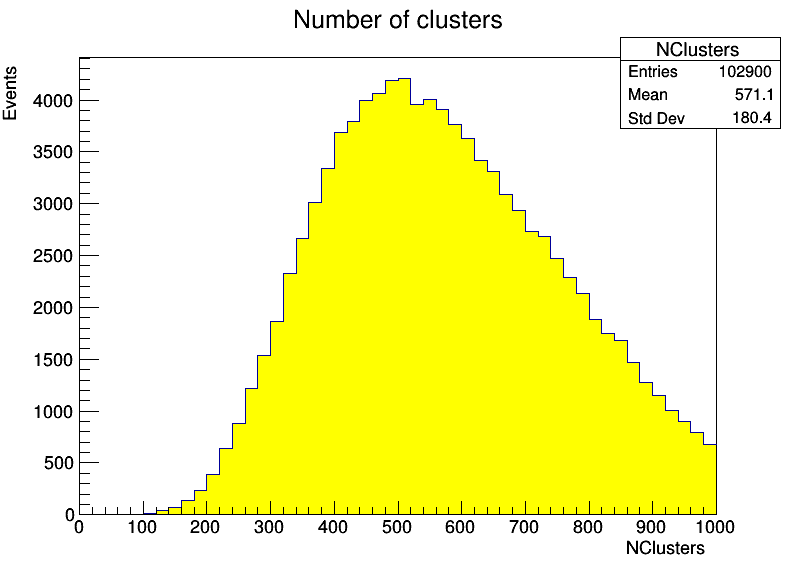

In [12]:
hist_nCltrs->SetFillColor(kYellow);
hist_nCltrs->Draw();
canvas->Draw();

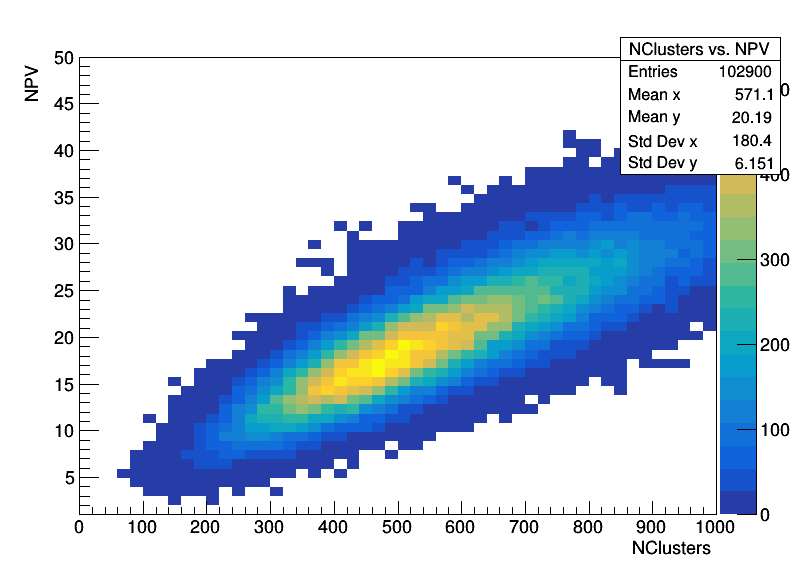

In [13]:
hist_nCltrs_npv->Draw("colz");
canvas->Draw();

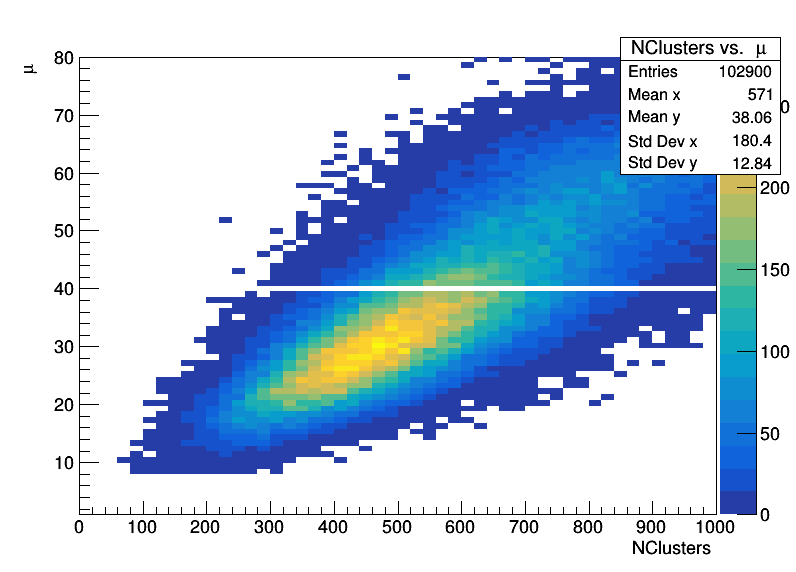

In [14]:
hist_nCltrs_mu->Draw("colz");
canvas->Draw();

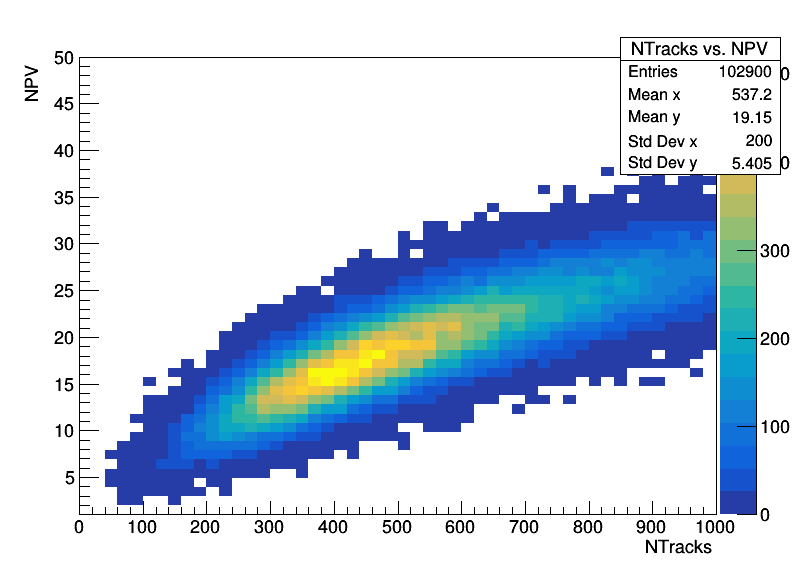

In [15]:
hist_nTrks_npv->Draw("colz");
canvas->Draw();

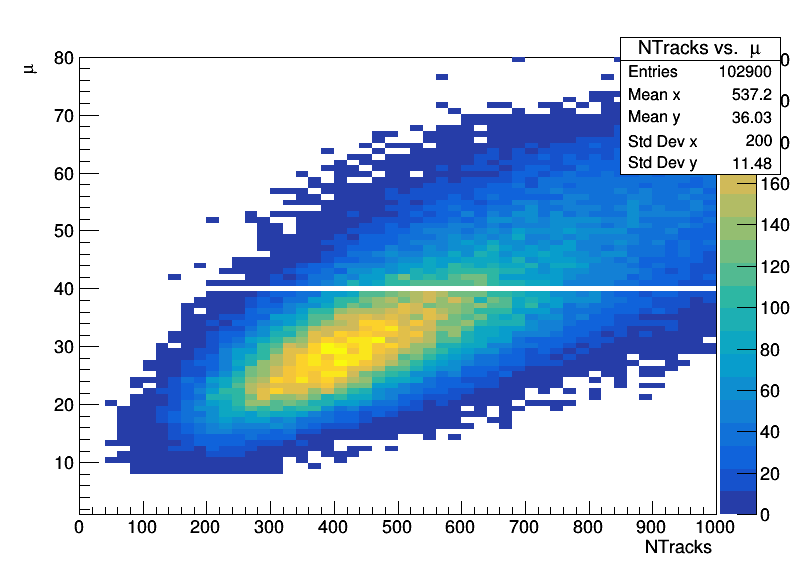

In [16]:
hist_nTrks_mu->Draw("colz");
canvas->Draw();

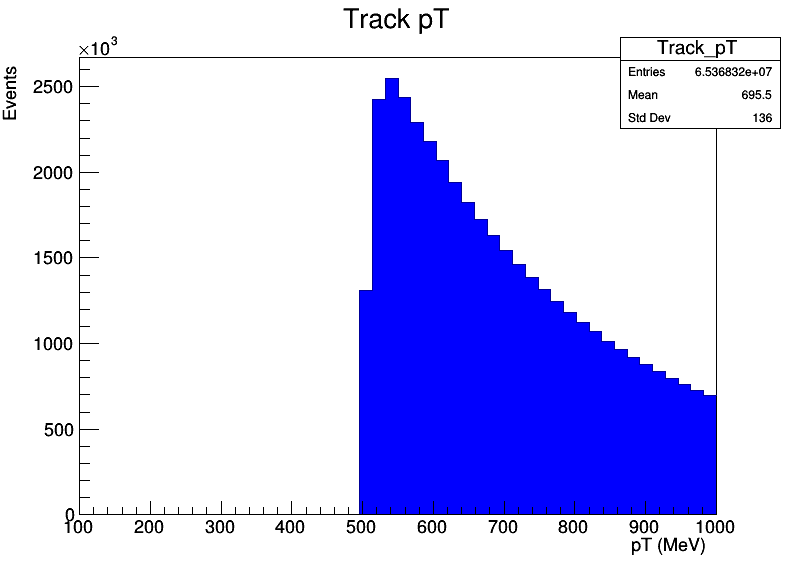

In [17]:
hist_track_pT->SetFillColor(kBlue);
hist_track_pT->Draw();
canvas->Draw();

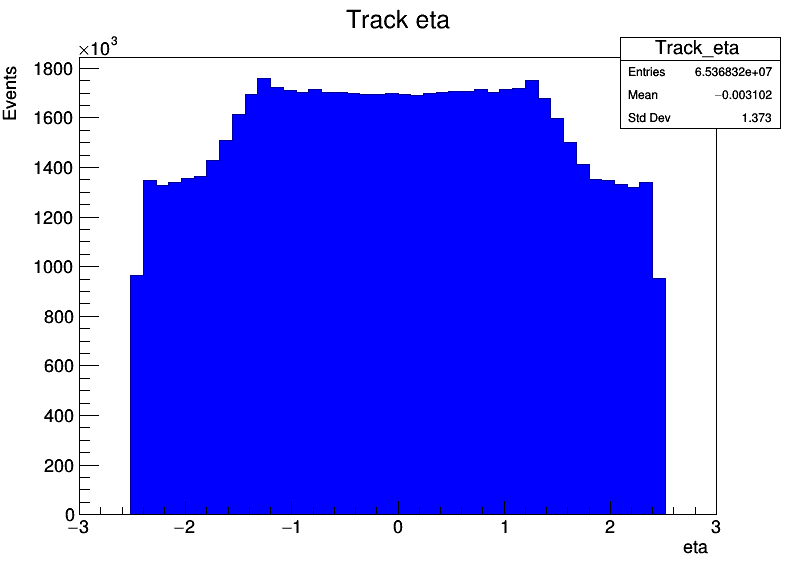

In [18]:
hist_track_eta->SetFillColor(kBlue);
hist_track_eta->Draw();
canvas->Draw();

<b> The coverage of the ATLAS tracker is between -2.5 and 2.5 eta. There is a transition between the barrel and the end-cap for eta between 1.3 and 1.7.</b>

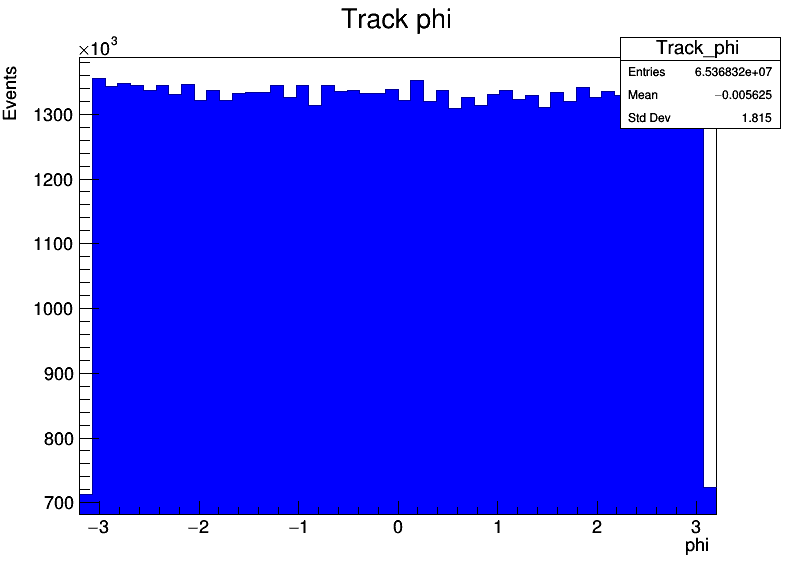

In [19]:
hist_track_phi->SetFillColor(kBlue);
hist_track_phi->Draw();
canvas->Draw();

<b> Complete coverage between -pi and pi</b>

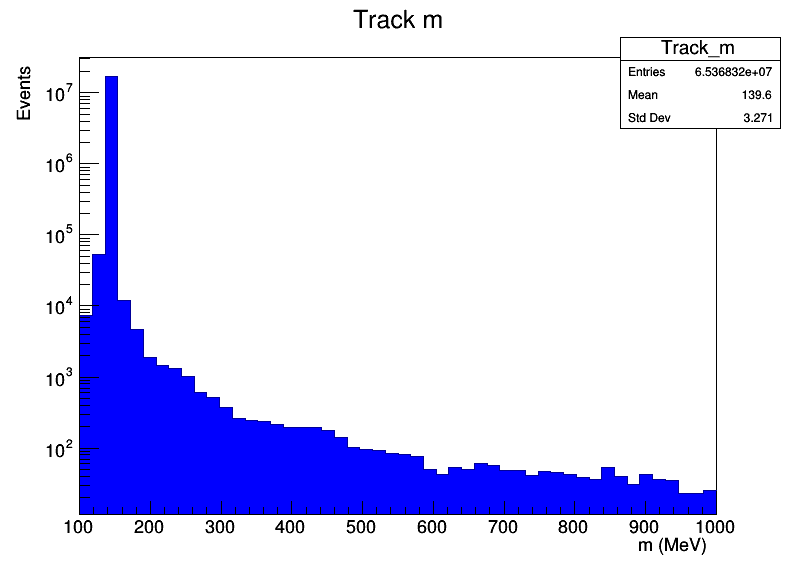

In [20]:
hist_track_m->SetFillColor(kBlue);
hist_track_m->Draw();
canvas->SetLogy();
canvas->Draw();

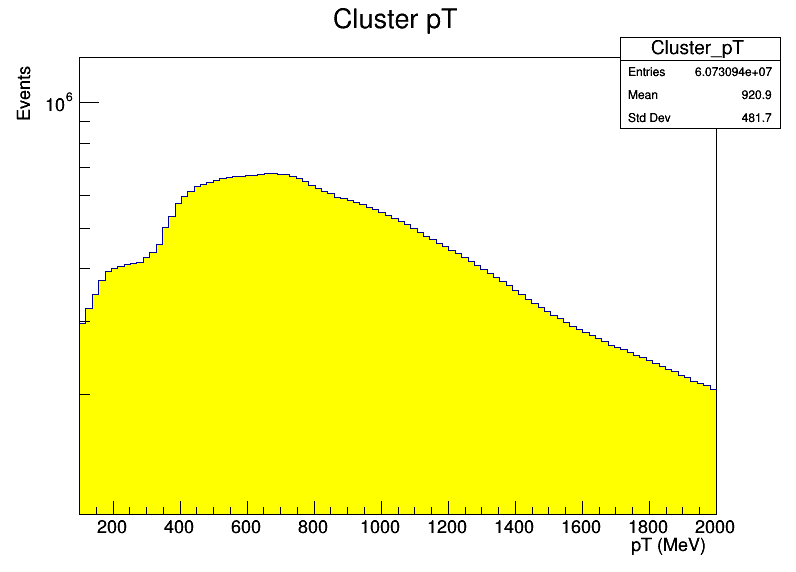

In [21]:
hist_cluster_pT->SetFillColor(kYellow);
hist_cluster_pT->Draw();
canvas->Draw();

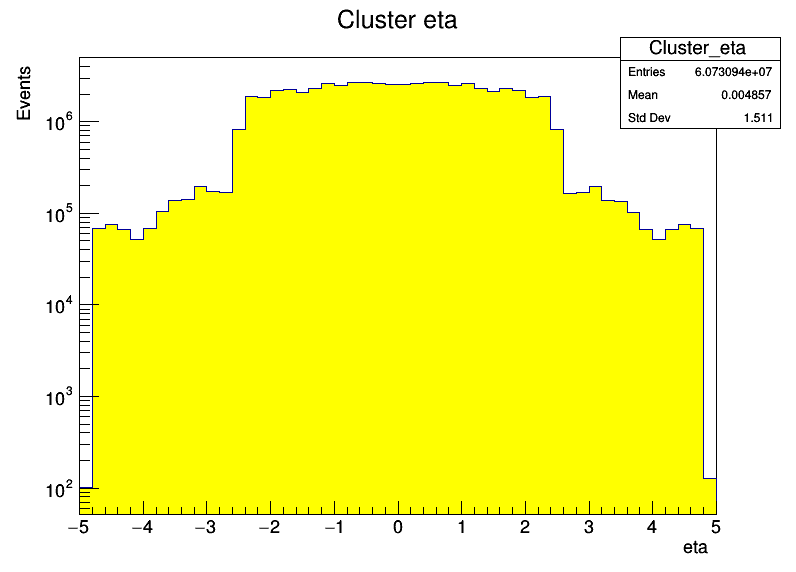

In [22]:
hist_cluster_eta->SetFillColor(kYellow);
hist_cluster_eta->Draw();
canvas->Draw();

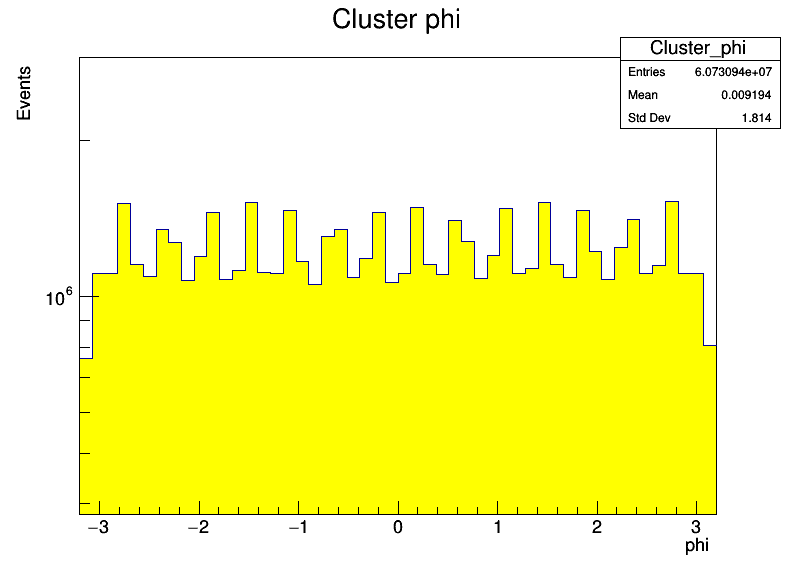

In [23]:
hist_cluster_phi->SetFillColor(kYellow);
hist_cluster_phi->Draw();
canvas->Draw();

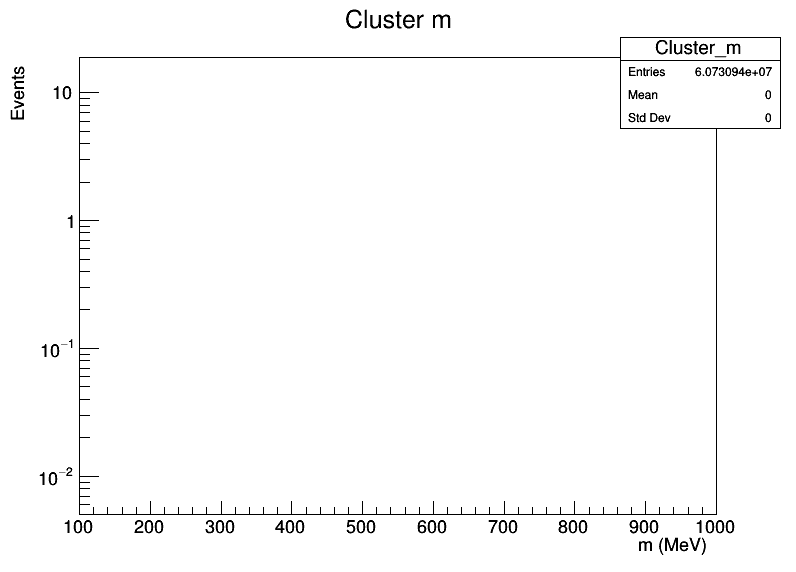

In [24]:
hist_cluster_m->SetFillColor(kYellow);
hist_cluster_m->Draw();
canvas->Draw();

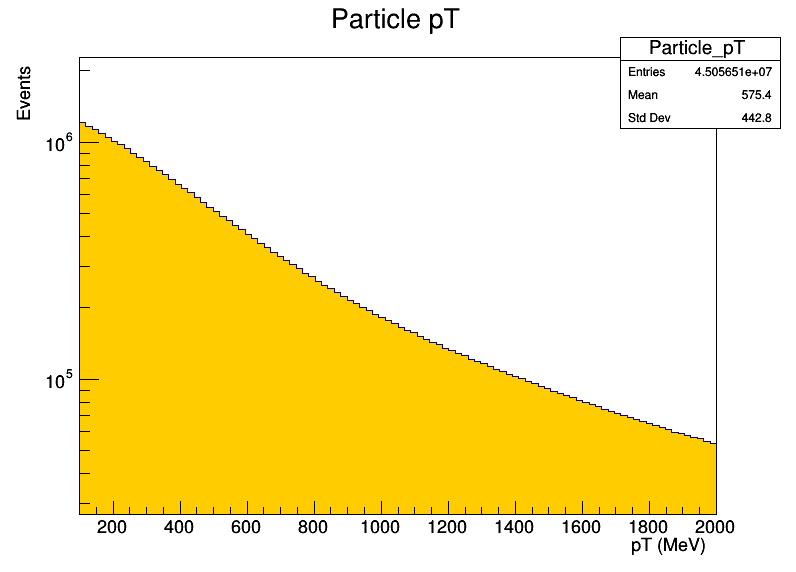

In [25]:
hist_particle_pT->SetFillColor(kOrange);
hist_particle_pT->Draw();
canvas->Draw();

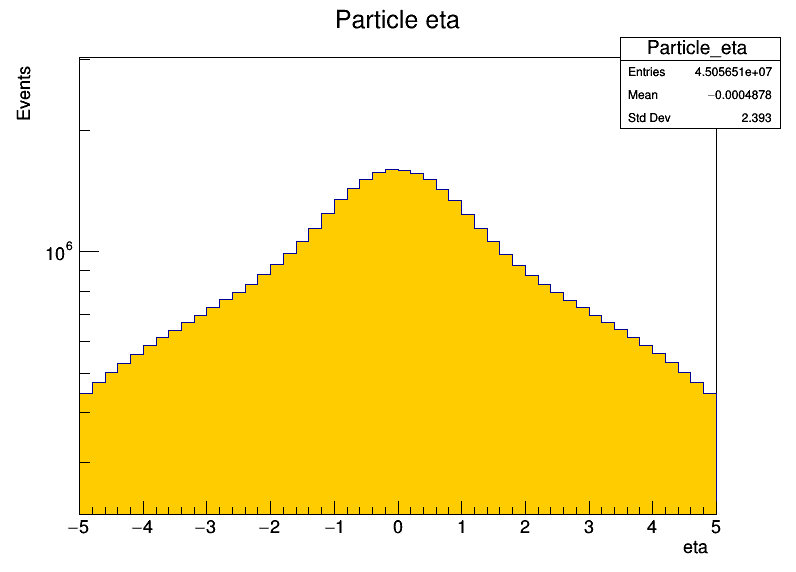

In [26]:
hist_particle_eta->SetFillColor(kOrange);
hist_particle_eta->Draw();
canvas->Draw();

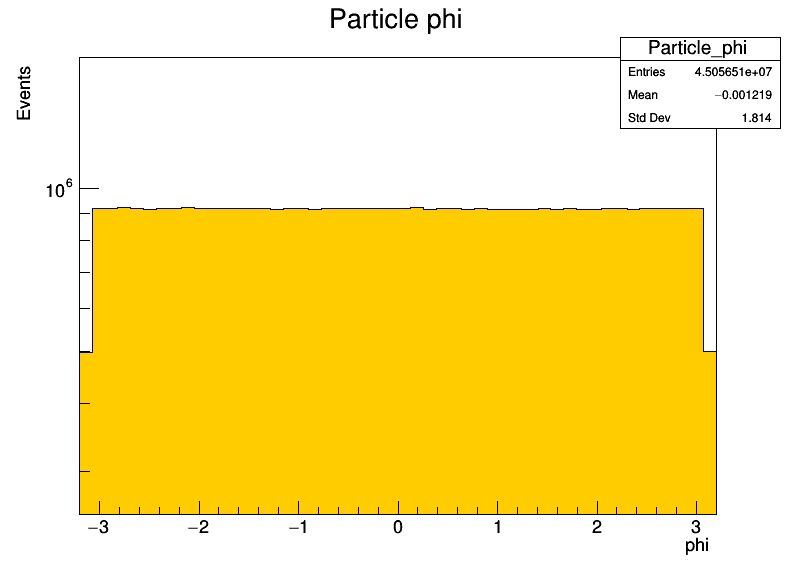

In [27]:
hist_particle_phi->SetFillColor(kOrange);
hist_particle_phi->Draw();
canvas->Draw();

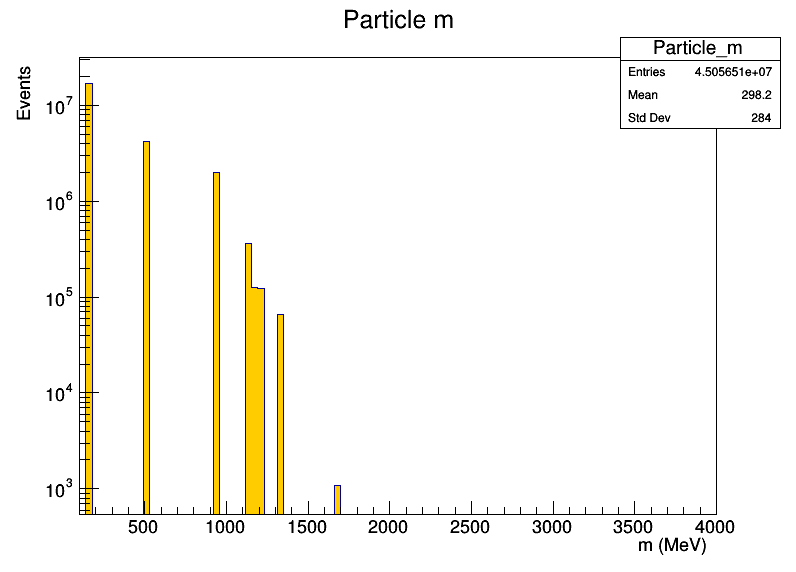

In [28]:
hist_particle_m->SetFillColor(kOrange);
hist_particle_m->Draw();
canvas->Draw();

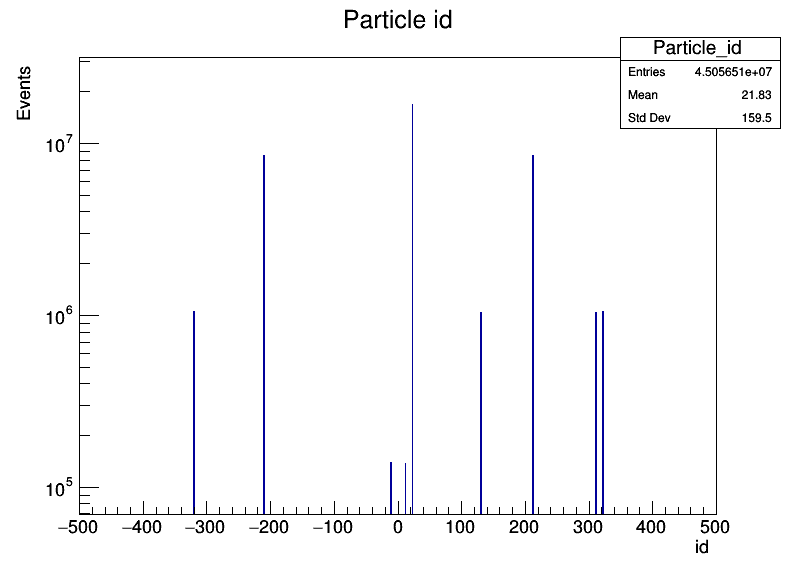

In [29]:
hist_particle_id->SetFillColor(kOrange);
hist_particle_id->Draw();
canvas->Draw();